# Introduction to Bosonic Qiskit

Sure, here's a brief explanation:

To use the `c2qa` package in your project, you need to ensure that it is located in the root directory of your project. This is because Python searches for packages to import in the directories listed in `sys.path`, which by default includes the current directory (i.e., the directory where your script is running). If `c2qa` is not in the root directory or another directory listed in `sys.path`, Python won't be able to find it.

However, you can manually add the directory containing `c2qa` to `sys.path` using the following code:

```python
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)
```

This code adds the parent directory of the parent directory of the current file to `sys.path`, allowing Python to import `c2qa` even if it's not in the current directory.

If you're using Poetry for dependency management, you can specify `c2qa` as a package in your `pyproject.toml` file like so:

```toml
[tool.setuptools]
packages = ["c2qa"]
```

This tells Poetry that `c2qa` is a package that your project depends on, and Poetry will ensure it's available for import when your project runs.

Please note that Bosonic Qiskit is not officially part of the Qiskit framework. To use it, you'll need to clone the Bosonic Qiskit GitHub repository. After cloning, you only need to keep the `c2qa` package and can delete all other files in the repository.

Remember to always keep your project's dependencies up to date and be aware of any changes or updates in the `c2qa` package or the Bosonic Qiskit repository.

In [38]:
import c2qa
import qiskit

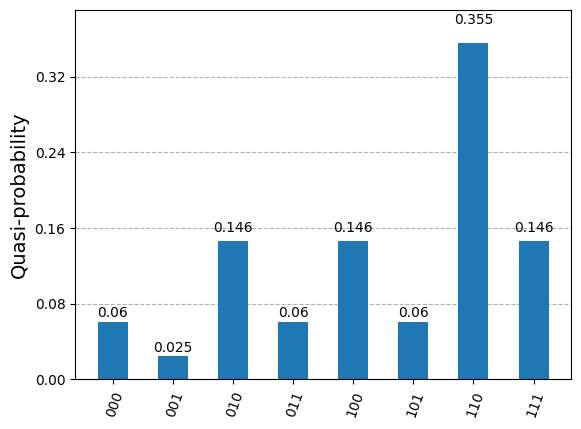

In [39]:
# Create a qumode register and quantum circuit
qumode_register = c2qa.QumodeRegister(
    num_qumodes=1, 
    num_qubits_per_qumode=3
)

circuit = c2qa.CVCircuit(qumode_register)

# Initialize the qumode to Fock state |1>
circuit.cv_initialize(1, qumode_register)

# Apply a displacement gate
circuit.cv_d(1j, qumode_register)

circuit.draw('mpl')

# Simulate the circuit
result = c2qa.util.simulate(circuit)

# print(result)
qiskit.visualization.plot_histogram(result[2])